<a href="https://colab.research.google.com/github/faisal-khrisan/E-commerce-Customer-spending-and-satisfaction-level-prediction/blob/main/E-commerce%20Customer%20spending%20and%20satisfaction%20level%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load The Dataset from Kaggal

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("uom190346a/e-commerce-customer-behavior-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/E-commerce Customer Behavior - Sheet1.csv")




100%|██████████| 2.84k/2.84k [00:00<00:00, 4.87MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uom190346a/e-commerce-customer-behavior-dataset/versions/1


# Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [ ]:
df.tail()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [ ]:
print(f"Number of Columns : {len(df.columns)}")
print (f"Number of Rows : {df.shape[0]}")


Number of Columns : 11
Number of Rows : 350


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [ ]:
df.isna().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [ ]:
df.nunique()

,0
Customer ID,350
Gender,2
Age,16
City,6
Membership Type,3
Total Spend,76
Items Purchased,15
Average Rating,20
Discount Applied,2
Days Since Last Purchase,54


In [ ]:
for col in df.columns:
    if df[col].dtypes == "object":

      print(f"{col} : {df[col].unique()}")


Gender : ['Female' 'Male']
City : ['New York' 'Los Angeles' 'Chicago' 'San Francisco' 'Miami' 'Houston']
Membership Type : ['Gold' 'Silver' 'Bronze']
Satisfaction Level : ['Satisfied' 'Neutral' 'Unsatisfied' nan]


# **1- Data Preprocessing**

## 1- fill missing data

In [ ]:
df[df["Satisfaction Level"].isnull()]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


In [ ]:
most_frequent = df['Satisfaction Level'].mode()[0]

In [ ]:
df['Satisfaction Level'] = df["Satisfaction Level"].fillna(most_frequent)

In [ ]:
df.isna().sum().any()

np.False_

## 2- Exploring the data and patterns

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,175
Male,175


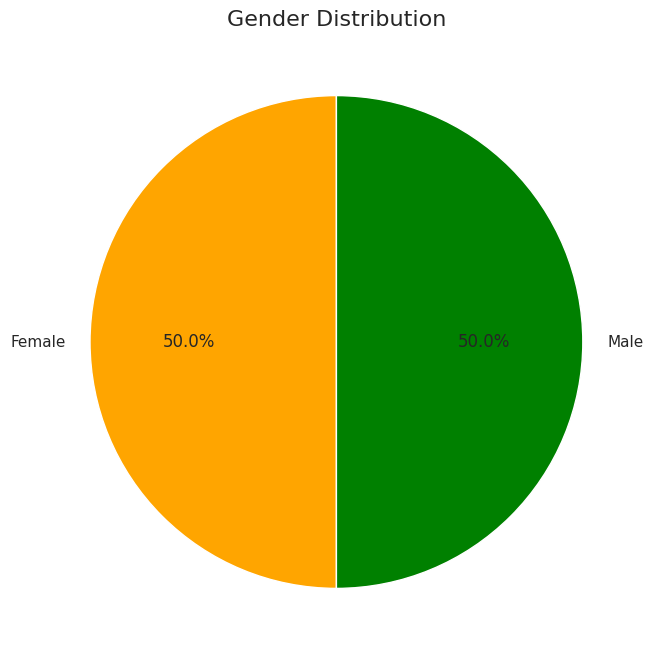

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Gender count pie chart
plt.figure(figsize=(8, 8))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'green'], startangle=90)
plt.title('Gender Distribution', fontsize=16)
plt.ylabel('')  # Hide the y-axis label
plt.show()

In [ ]:
df['Age'].value_counts()

,count
Age,
30,48
32,33
31,25
43,25
35,25
27,25
36,25
34,24
28,24


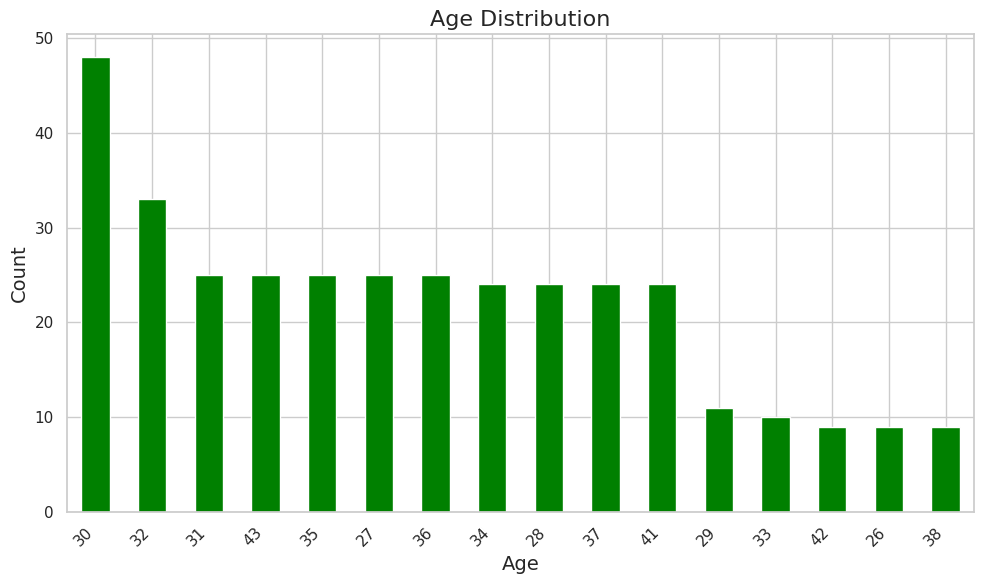

In [ ]:
plt.figure(figsize=(10, 6))
df['Age'].value_counts().plot(kind='bar', color='green')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df['Membership Type'].value_counts()

,count
Membership Type,
Gold,117
Silver,117
Bronze,116


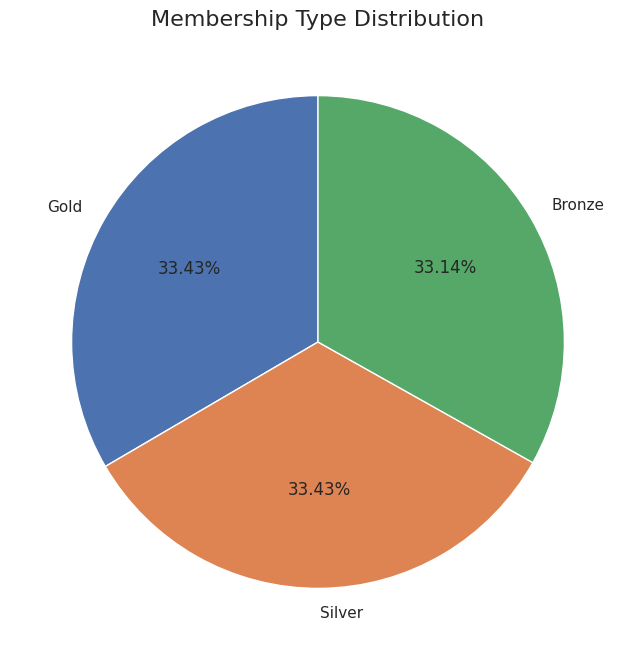

In [ ]:
plt.figure(figsize=(8, 8))
df['Membership Type'].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Membership Type Distribution', fontsize=16)
plt.ylabel('')
plt.show()

In [ ]:
df['Satisfaction Level'].value_counts()

,count
Satisfaction Level,
Satisfied,127
Unsatisfied,116
Neutral,107


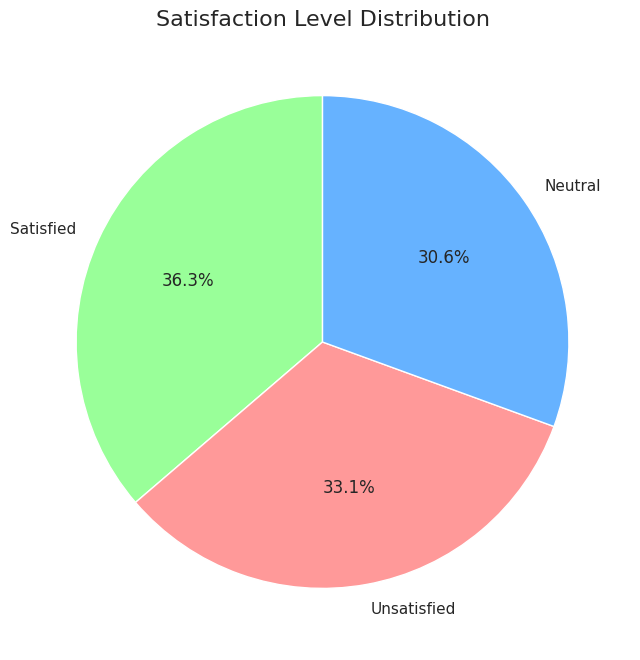

In [ ]:
plt.figure(figsize=(8, 8))
df['Satisfaction Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#99FF99', '#FF9999','#66B2FF',])
plt.title('Satisfaction Level Distribution', fontsize=16)
plt.ylabel('')
plt.show()

### Distribution of Key Numerical Variables


Histogram of Total Spend


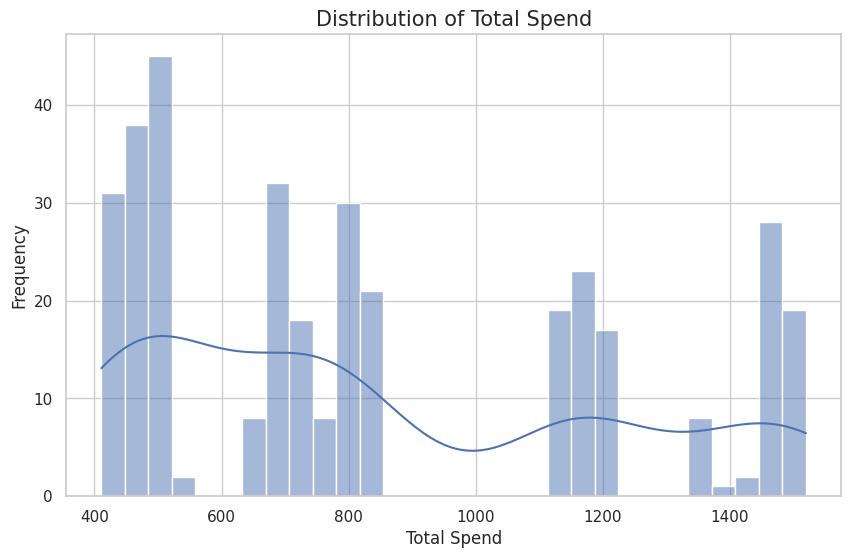

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Total Spend'], kde=True, bins=30)
plt.title('Distribution of Total Spend', fontsize=15)
plt.xlabel('Total Spend', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

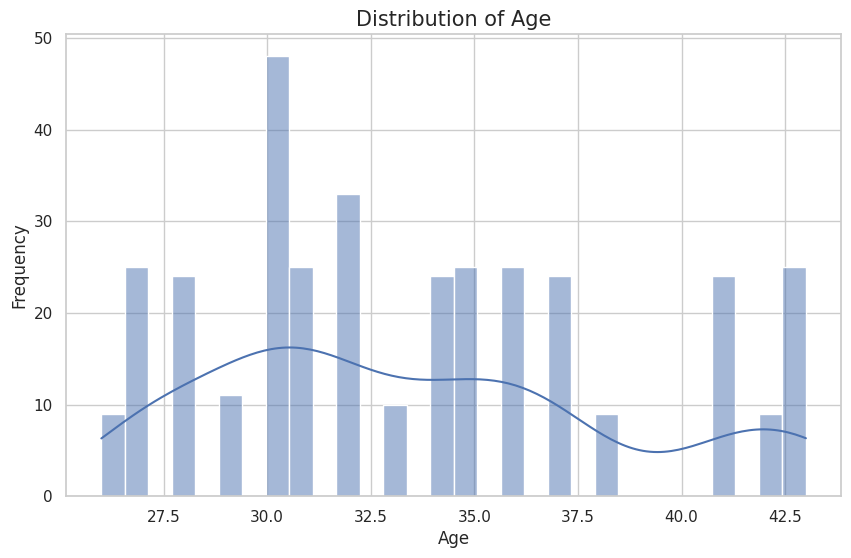

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [ ]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


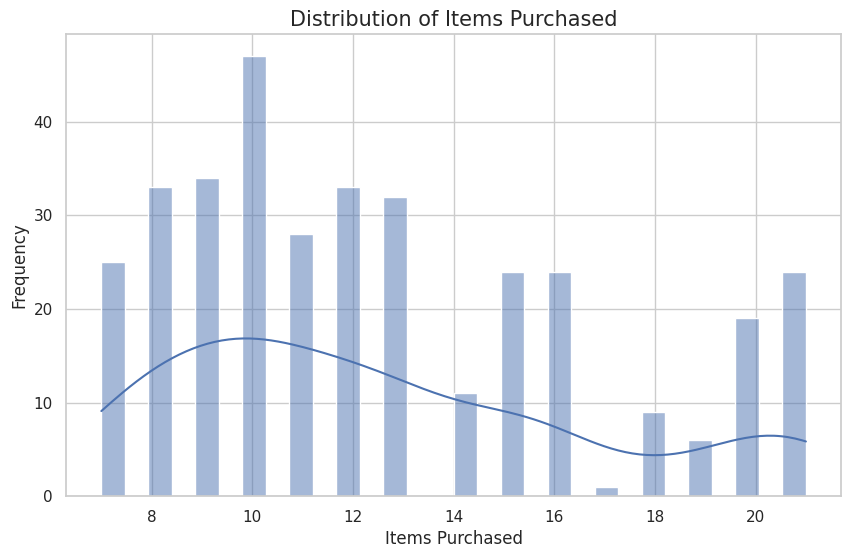

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Items Purchased'], kde=True, bins=30)
plt.title('Distribution of Items Purchased', fontsize=15)
plt.xlabel('Items Purchased', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

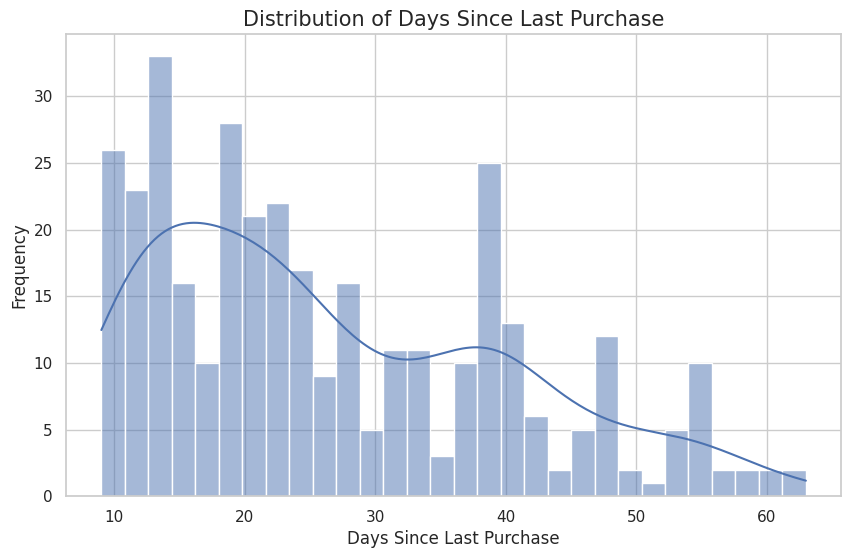

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Days Since Last Purchase'], kde=True, bins=30)
plt.title('Distribution of Days Since Last Purchase', fontsize=15)
plt.xlabel('Days Since Last Purchase', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

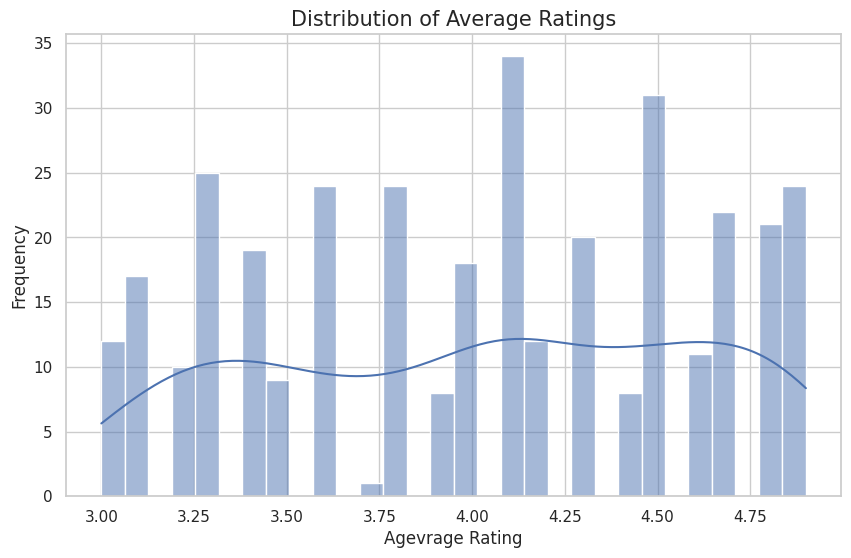

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Average Rating'], kde=True, bins=30)
plt.title('Distribution of Average Ratings', fontsize=15)
plt.xlabel('Agevrage Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

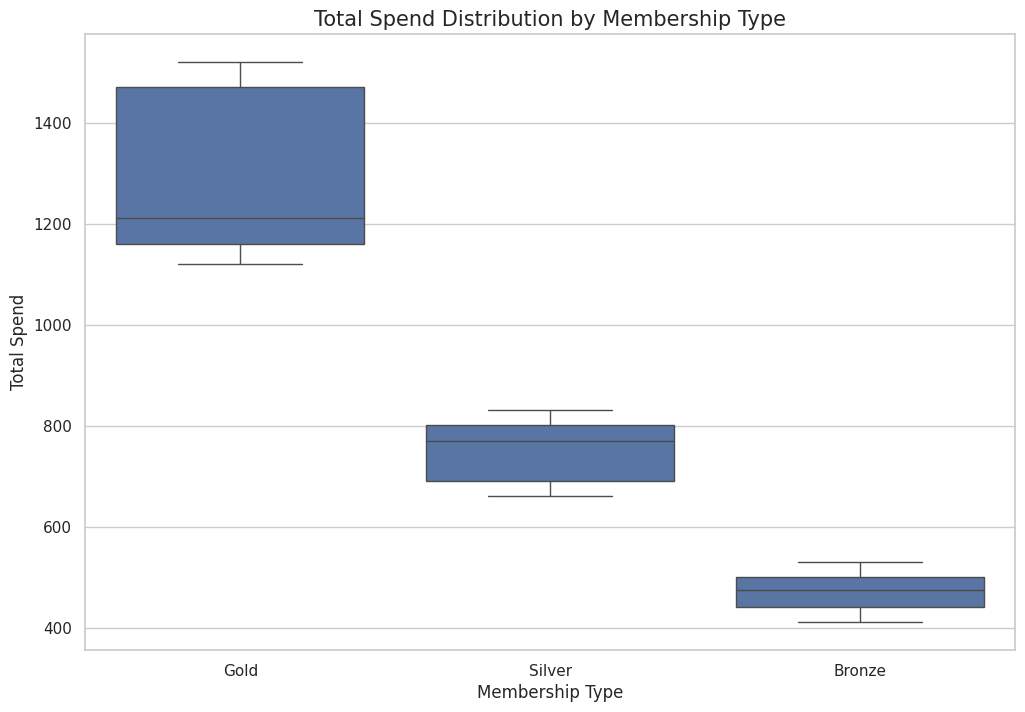

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Membership Type', y='Total Spend', data=df)
plt.title('Total Spend Distribution by Membership Type', fontsize=15)
plt.xlabel('Membership Type', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)
plt.show()

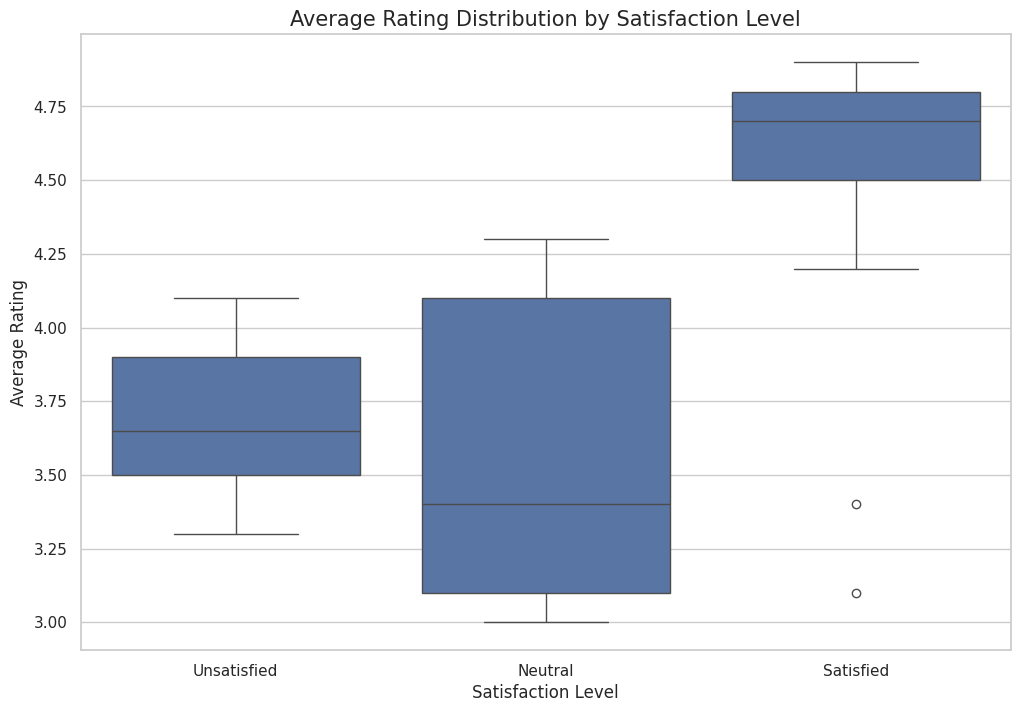

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Satisfaction Level', y='Average Rating', data=df, order=['Unsatisfied', 'Neutral', 'Satisfied'])
plt.title('Average Rating Distribution by Satisfaction Level', fontsize=15)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.show()

## 3-  Feature encoding and creation

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df = pd.get_dummies(df, columns=['City'], drop_first=True)

df['Satisfaction Level'] = df['Satisfaction Level'].map({'Unsatisfied': 0, 'Neutral': 1, 'Satisfied': 2})

label_encoder = LabelEncoder()

df['Membership Type'] = label_encoder.fit_transform(df['Membership Type'])


In [ ]:
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '56+'])
df.head()

,Customer ID,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Age Group
0,101,1,29,1,1120.20,14,4.6,True,25,2,False,False,False,True,False,26-35
1,102,0,34,2,780.50,11,4.1,False,18,1,False,True,False,False,False,26-35
2,103,1,43,0,510.75,9,3.4,True,42,0,False,False,False,False,False,36-45
3,104,0,30,1,1480.30,19,4.7,False,12,2,False,False,False,False,True,26-35
4,105,0,27,2,720.40,13,4.0,True,55,0,False,False,True,False,False,26-35


In [ ]:
df['Last Purchase Bin'] = pd.cut(df['Days Since Last Purchase'], bins=[0, 30, 60, 90, 180, 365], labels=['0-30', '31-60', '61-90', '91-180', '181+'])
df.head()

,Customer ID,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Age Group,Last Purchase Bin
0,101,1,29,1,1120.20,14,4.6,True,25,2,False,False,False,True,False,26-35,0-30
1,102,0,34,2,780.50,11,4.1,False,18,1,False,True,False,False,False,26-35,0-30
2,103,1,43,0,510.75,9,3.4,True,42,0,False,False,False,False,False,36-45,31-60
3,104,0,30,1,1480.30,19,4.7,False,12,2,False,False,False,False,True,26-35,0-30
4,105,0,27,2,720.40,13,4.0,True,55,0,False,False,True,False,False,26-35,31-60


In [ ]:
df = pd.get_dummies(df, columns=['Age Group', 'Last Purchase Bin'], drop_first=True)
df.head()

,Customer ID,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,...,City_New York,City_San Francisco,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56+,Last Purchase Bin_31-60,Last Purchase Bin_61-90,Last Purchase Bin_91-180,Last Purchase Bin_181+
0,101,1,29,1,1120.20,14,4.6,True,25,2,...,True,False,True,False,False,False,False,False,False,False
1,102,0,34,2,780.50,11,4.1,False,18,1,...,False,False,True,False,False,False,False,False,False,False
2,103,1,43,0,510.75,9,3.4,True,42,0,...,False,False,False,True,False,False,True,False,False,False
3,104,0,30,1,1480.30,19,4.7,False,12,2,...,False,True,True,False,False,False,False,False,False,False
4,105,0,27,2,720.40,13,4.0,True,55,0,...,False,False,True,False,False,False,True,False,False,False


## 4- Features Scaling

In [ ]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Membership Type', 'Total Spend',
       'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level', 'City_Houston',
       'City_Los Angeles', 'City_Miami', 'City_New York', 'City_San Francisco',
       'Age Group_26-35', 'Age Group_36-45', 'Age Group_46-55',
       'Age Group_56+', 'Last Purchase Bin_31-60', 'Last Purchase Bin_61-90',
       'Last Purchase Bin_91-180', 'Last Purchase Bin_181+'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Total Spend', 'Items Purchased', 'Days Since Last Purchase']] = scaler.fit_transform(df[['Age', 'Total Spend', 'Items Purchased', 'Days Since Last Purchase']])

In [ ]:
df.head()

,Customer ID,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,...,City_New York,City_San Francisco,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56+,Last Purchase Bin_31-60,Last Purchase Bin_61-90,Last Purchase Bin_91-180,Last Purchase Bin_181+
0,101,1,-0.945152,1,0.760130,0.337346,4.6,True,-0.118359,2,...,True,False,True,False,False,False,False,False,False,False
1,102,0,0.082826,2,-0.179459,-0.385538,4.1,False,-0.639907,1,...,False,False,True,False,False,False,False,False,False,False
2,103,1,1.933185,0,-0.925570,-0.867461,3.4,True,1.148256,0,...,False,False,False,True,False,False,True,False,False,False
3,104,0,-0.739557,1,1.756144,1.542153,4.7,False,-1.086947,2,...,False,True,True,False,False,False,False,False,False,False
4,105,0,-1.356343,2,-0.345692,0.096385,4.0,True,2.116844,0,...,False,False,True,False,False,False,True,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    int64  
 2   Age                       350 non-null    float64
 3   Membership Type           350 non-null    int64  
 4   Total Spend               350 non-null    float64
 5   Items Purchased           350 non-null    float64
 6   Average Rating            350 non-null    float64
 7   Discount Applied          350 non-null    bool   
 8   Days Since Last Purchase  350 non-null    float64
 9   Satisfaction Level        350 non-null    int64  
 10  City_Houston              350 non-null    bool   
 11  City_Los Angeles          350 non-null    bool   
 12  City_Miami                350 non-null    bool   
 13  City_New York             350 non-null    bool   
 14  City_San F

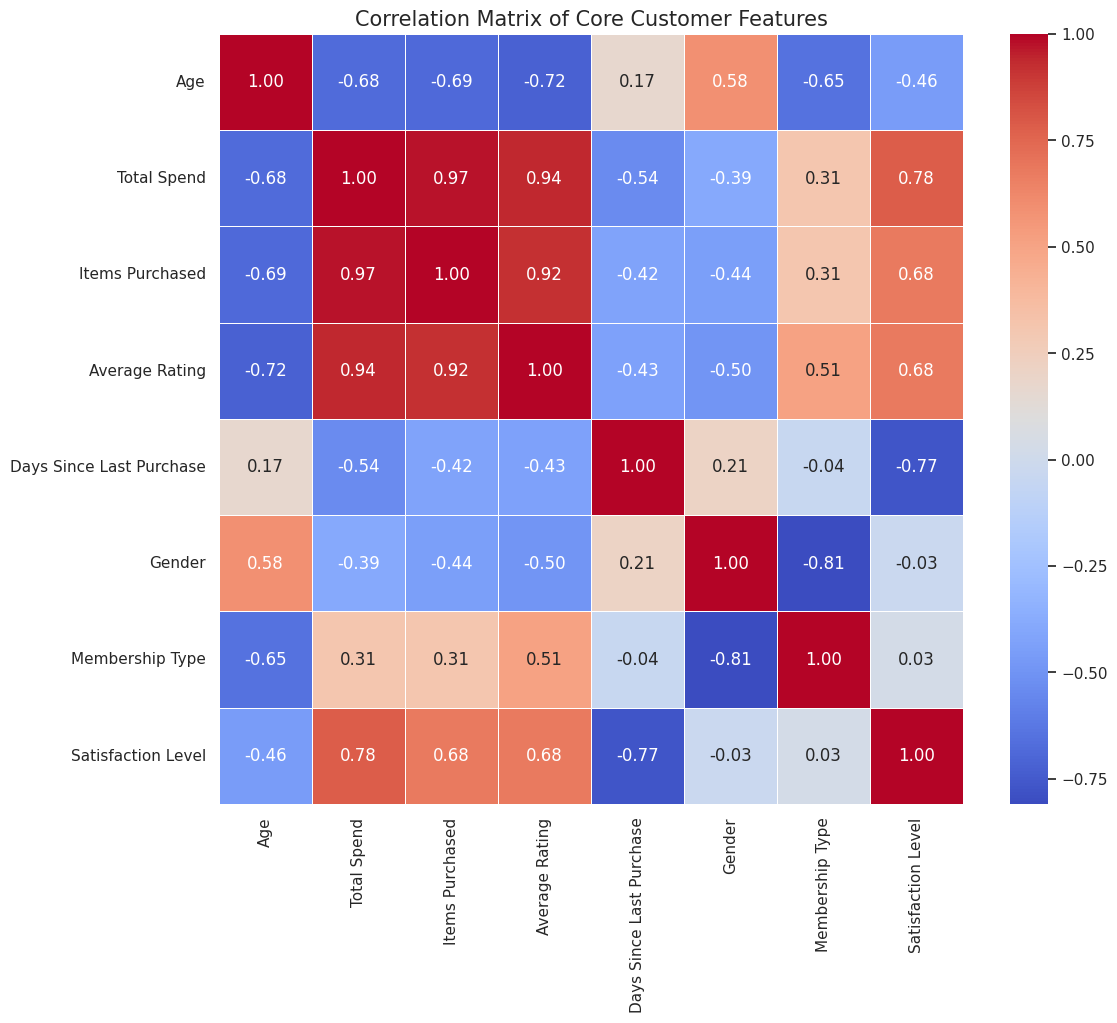

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the core numerical and key ordinal features you want to analyze
# We exclude the one-hot encoded columns for clarity
core_features = [
    'Age',
    'Total Spend',
    'Items Purchased',
    'Average Rating',
    'Days Since Last Purchase',
    'Gender', # Encoded as a number
    'Membership Type', # Encoded as a number
    'Satisfaction Level' # Encoded as a number
]

# Create the correlation matrix from your final dataframe 'df'
corr_matrix = df[core_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Core Customer Features', fontsize=15)
plt.show()

# **2- Model Building and Evaluation**

## 1- Linear Regerssion

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature and target selection
X1 = df.drop(columns=['Total Spend','Satisfaction Level'])
y1 = df['Total Spend']

# Split the data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Build model
# Use scaled features for linear regression

model = LinearRegression()
model.fit(X_train_scaled1, y_train1)

# Predict on test set
y_pred_reg = model.predict(X_test_scaled1)

# Evaluate model
mse = mean_squared_error(y_test1, y_pred_reg)
mae = mean_absolute_error(y_test1, y_pred_reg)
r2 = r2_score(y_test1, y_pred_reg)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
R² Score: 0.9983


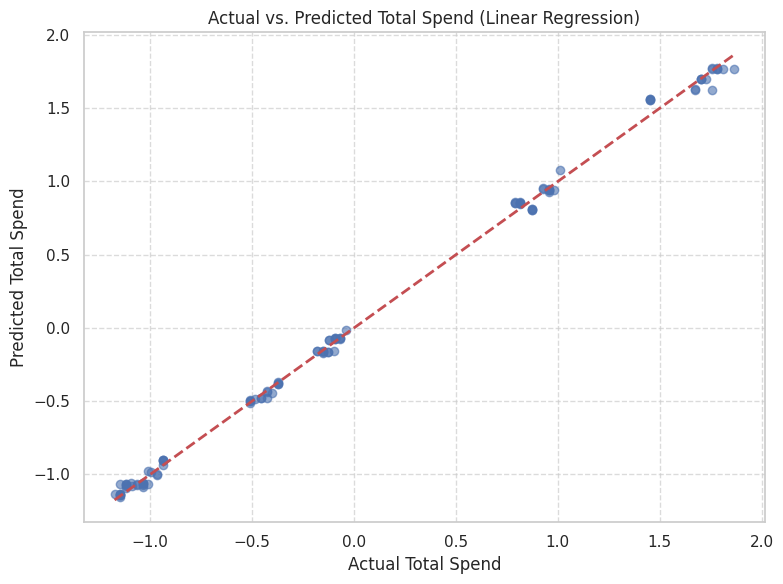

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test1, y_pred_reg, alpha=0.6)
mn, mx = y_test1.min(), y_test1.max()
plt.plot([mn, mx], [mn, mx], 'r--', lw=2)
plt.xlabel("Actual Total Spend")
plt.ylabel("Predicted Total Spend")
plt.title("Actual vs. Predicted Total Spend (Linear Regression)")
plt.grid(True, ls='--', alpha=0.7)
plt.tight_layout()
plt.show()

Feature Coefficients for Linear Regression:
Customer ID                 0.003793
Gender                     -0.018441
Age                         0.032419
Membership Type             0.211595
Items Purchased             0.289979
Average Rating              0.009553
Discount Applied           -0.157893
Days Since Last Purchase   -0.054491
City_Houston               -0.120224
City_Los Angeles           -0.111324
City_Miami                 -0.064862
City_New York               0.398667
City_San Francisco          0.438342
Age Group_26-35             0.019338
Age Group_36-45            -0.019338
Age Group_46-55             0.000000
Age Group_56+               0.000000
Last Purchase Bin_31-60     0.011103
Last Purchase Bin_61-90     0.003472
Last Purchase Bin_91-180    0.000000
Last Purchase Bin_181+      0.000000
dtype: float64


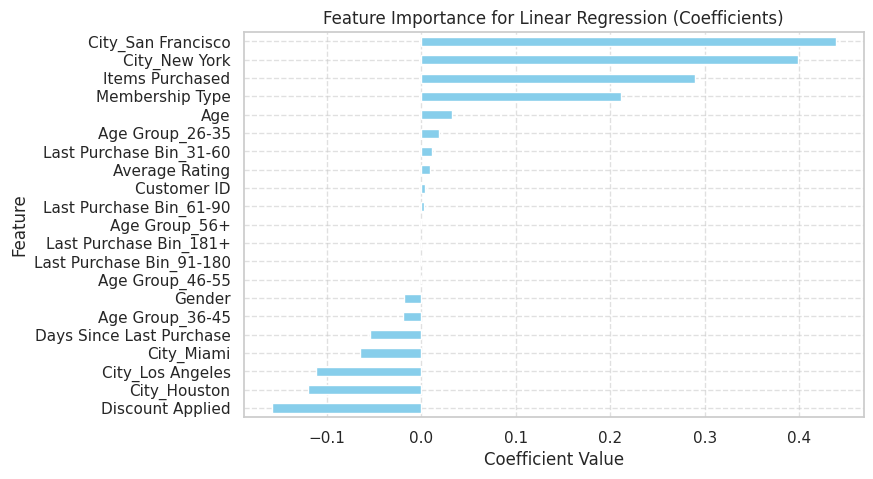

In [ ]:
# Get the feature names
feature_names = X1.columns

# Get the coefficients from the trained model
coefficients = model.coef_

# Create a pandas Series to view the coefficients with their feature names
linear_feature_importance = pd.Series(coefficients, index=feature_names)

print("Feature Coefficients for Linear Regression:")
print(linear_feature_importance)

# Plot the feature coefficients
plt.figure(figsize=(8, 5))
linear_feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance for Linear Regression (Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 2- Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model1.fit(X_train1, y_train1)

# Predict on test set
y_pred_gb = model1.predict(X_test1)

# Evaluate model
mse = mean_squared_error(y_test1, y_pred_gb)
mae = mean_absolute_error(y_test1, y_pred_gb)
r2 = r2_score(y_test1, y_pred_gb)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
R² Score: 0.9987


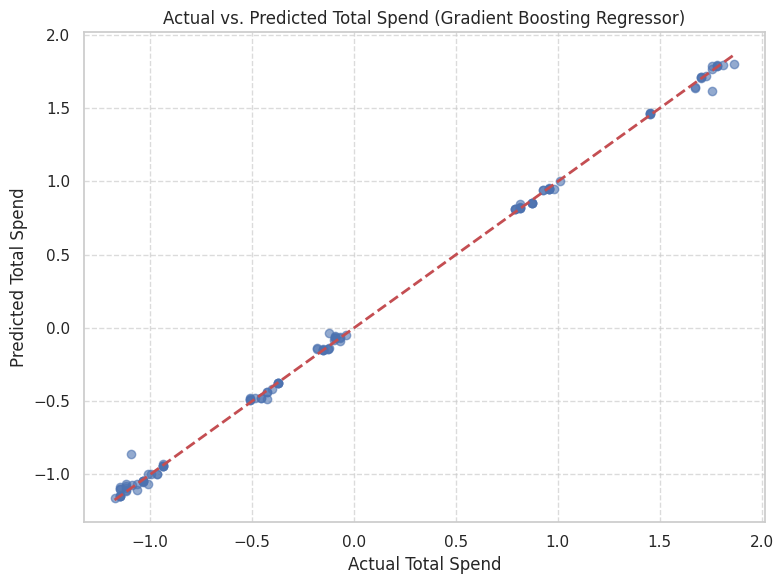

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test1, y_pred_gb, alpha=0.6)
mn, mx = y_test1.min(), y_test1.max()
plt.plot([mn, mx], [mn, mx], 'r--', lw=2)
plt.xlabel("Actual Total Spend")
plt.ylabel("Predicted Total Spend")
plt.title("Actual vs. Predicted Total Spend (Gradient Boosting Regressor)")
plt.grid(True, ls='--', alpha=0.7)
plt.tight_layout()
plt.show()

                     feature  mean_drop  std_drop
4            Items Purchased   1.185951  0.151379
5             Average Rating   0.037025  0.004042
7   Days Since Last Purchase   0.033061  0.003164
13           Age Group_26-35   0.009990  0.000938
1                     Gender   0.009155  0.001043
3            Membership Type   0.007935  0.002142
6           Discount Applied   0.004663  0.000691
12        City_San Francisco   0.002423  0.000250
9           City_Los Angeles   0.001584  0.000317
11             City_New York   0.001029  0.000184
2                        Age   0.000944  0.000175
8               City_Houston   0.000430  0.000059
10                City_Miami   0.000248  0.000154
14           Age Group_36-45   0.000095  0.000053
0                Customer ID   0.000014  0.000025
15           Age Group_46-55   0.000000  0.000000
16             Age Group_56+   0.000000  0.000000
17   Last Purchase Bin_31-60   0.000000  0.000000
18   Last Purchase Bin_61-90   0.000000  0.000000


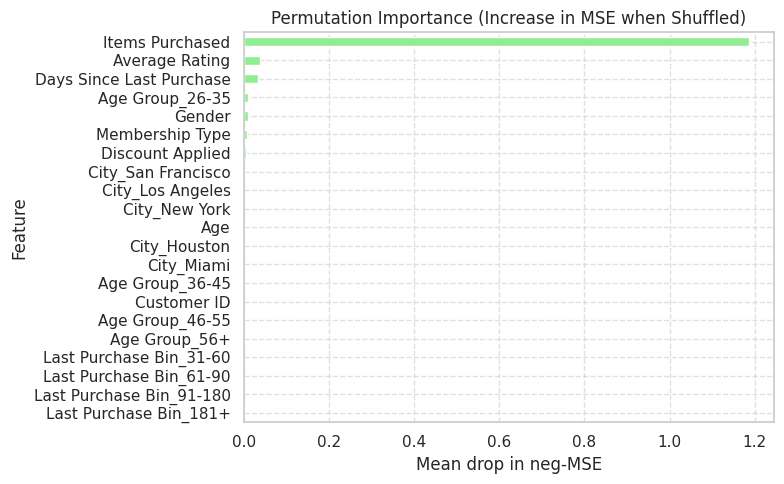

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# 1. Compute permutation importances
perm = permutation_importance(
    model1,
    X_test1,
    y_test1,
    scoring='neg_mean_squared_error',
    n_repeats=10,
    random_state=42
)

# 2. Build a DataFrame
imp_df = pd.DataFrame({
    'feature': X_test1.columns,
    'mean_drop': perm.importances_mean,
    'std_drop':   perm.importances_std
})

# 3. Sort by mean_drop (largest first)
imp_df = imp_df.sort_values(by='mean_drop', ascending=False)

# 4. Print the table
print(imp_df)

# 5. Plot horizontal bar chart
ax = imp_df.plot(
    kind='barh',
    x='feature',
    y='mean_drop',
    legend=False,
    figsize=(8, 5),
    color='lightgreen'
)
ax.set_title('Permutation Importance (Increase in MSE when Shuffled)')
ax.set_xlabel('Mean drop in neg-MSE')
ax.set_ylabel('Feature')
ax.invert_yaxis()   # so the top feature appears at the top
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Classification

## 1- Randomforest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data (before any model)
X = df.drop(columns=['Satisfaction Level'])
y = df['Satisfaction Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (used in models that require it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier



# Build
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_rf = rf_model.predict(X_test)






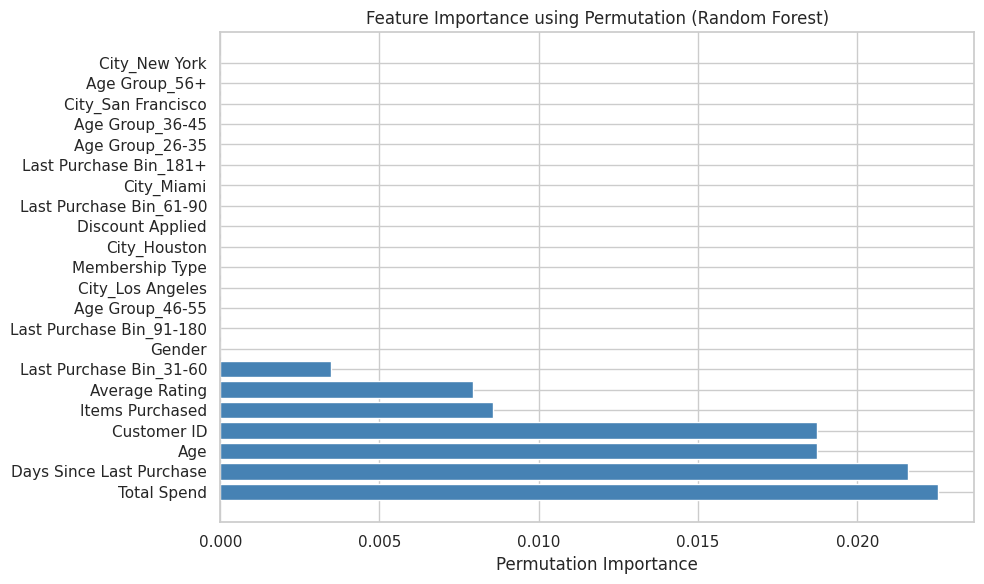

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_model,
    X_test,
    y_test,
    n_repeats=30,
    random_state=42,
    scoring='accuracy'
)

# Convert to DataFrame for better readability
feature_importances = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False)



# Sort features by importance mean (descending for left-to-right bars)
feature_importances_sorted = feature_importances.sort_values(by='Importance Mean', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(
    feature_importances_sorted['Feature'],
    feature_importances_sorted['Importance Mean'].abs(),
    color='steelblue'
)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance using Permutation (Random Forest)")
plt.tight_layout()
plt.show()


===== Random Forest Classification =====
Accuracy: 0.9714
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        40

    accuracy                           0.97       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.97      0.97      0.97       105



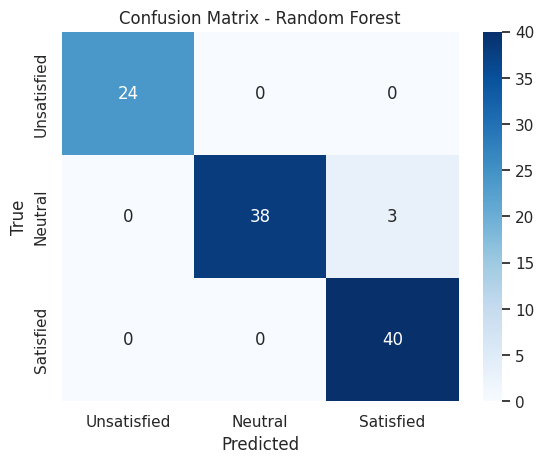

In [ ]:
print("===== Random Forest Classification =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unsatisfied', 'Neutral', 'Satisfied'],
            yticklabels=['Unsatisfied', 'Neutral', 'Satisfied'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## 2- logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Build
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predict & Evaluate
y_pred_lr = lr_model.predict(X_test_scaled)


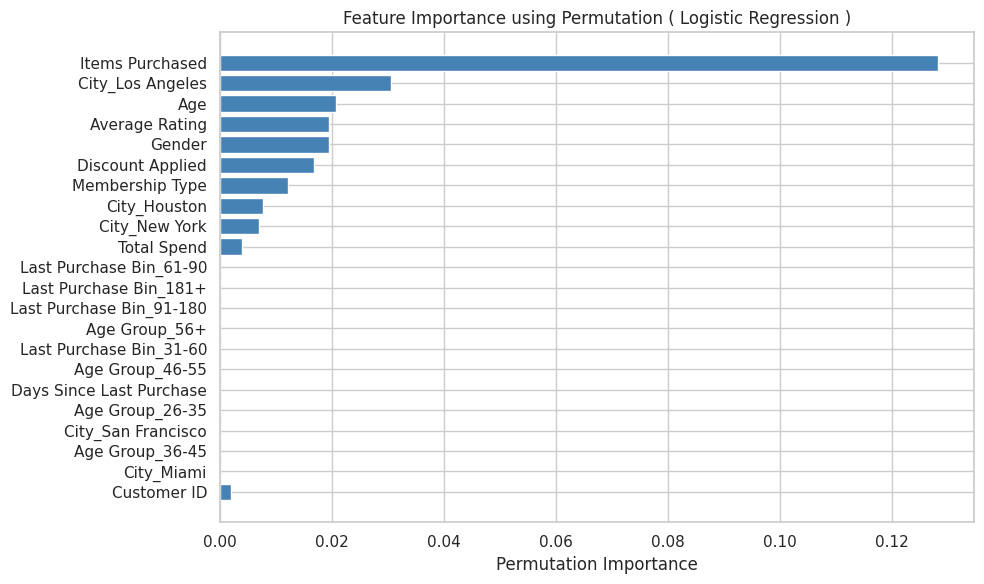

In [ ]:
result = permutation_importance(
    lr_model,
    X_test_scaled,
    y_test,
    n_repeats=30,
    random_state=42,
    scoring='accuracy'
)

# Convert to DataFrame for better readability
feature_importances = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False)



# Sort features by importance mean (descending for left-to-right bars)
feature_importances_sorted = feature_importances.sort_values(by='Importance Mean', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(
    feature_importances_sorted['Feature'],
    feature_importances_sorted['Importance Mean'].abs(),
    color='steelblue'
)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance using Permutation ( Logistic Regression )")
plt.tight_layout()
plt.show()

===== Logistic Regression Classification =====
Accuracy: 0.9905
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.98      1.00      0.99        41
           2       1.00      0.97      0.99        40

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105



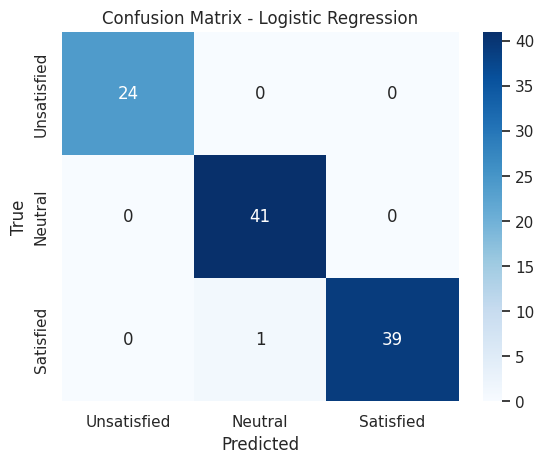

In [ ]:

print("===== Logistic Regression Classification =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unsatisfied', 'Neutral', 'Satisfied'],
            yticklabels=['Unsatisfied', 'Neutral', 'Satisfied'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## 3- KNN

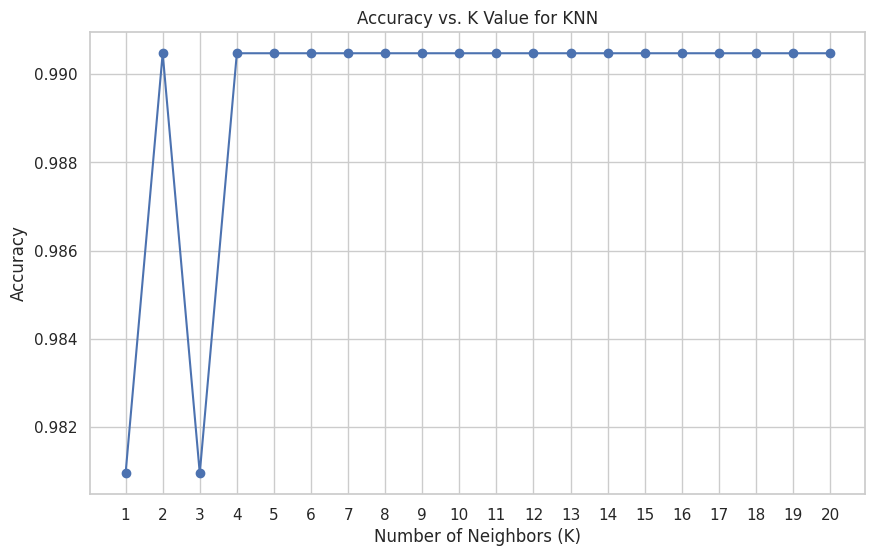

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Try different values of K from 1 to 20
k_values = list(range(1, 21))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot K vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("Accuracy vs. K Value for KNN")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Build
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict & Evaluate
y_pred_knn = knn_model.predict(X_test_scaled)




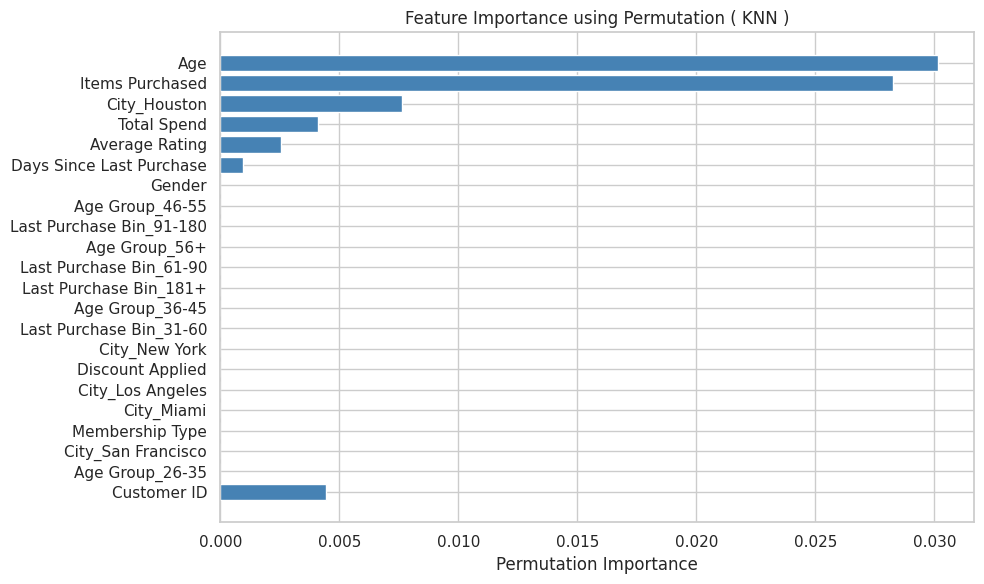

In [ ]:
result = permutation_importance(
    knn_model,
    X_test_scaled,
    y_test,
    n_repeats=30,
    random_state=42,
    scoring='accuracy'
)

# Convert to DataFrame for better readability
feature_importances = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False)



# Sort features by importance mean (descending for left-to-right bars)
feature_importances_sorted = feature_importances.sort_values(by='Importance Mean', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(
    feature_importances_sorted['Feature'],
    feature_importances_sorted['Importance Mean'].abs(),
    color='steelblue'
)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance using Permutation ( KNN )")
plt.tight_layout()
plt.show()

===== K-Nearest Neighbors Classification =====
Accuracy: 0.9905
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.98      1.00      0.99        41
           2       1.00      0.97      0.99        40

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105



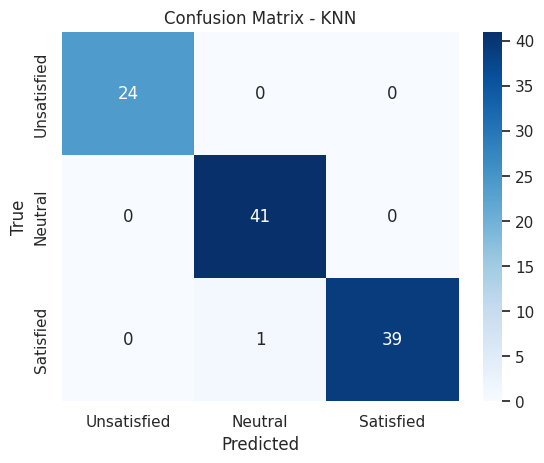

In [ ]:
print("===== K-Nearest Neighbors Classification =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unsatisfied', 'Neutral', 'Satisfied'],
            yticklabels=['Unsatisfied', 'Neutral', 'Satisfied'])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 4- SVM

In [ ]:
from sklearn.svm import SVC

# SVM model
svm = SVC(kernel='rbf', C=1.0)
svm.fit(X_train_scaled, y_train)
svm_preds = svm.predict(X_test_scaled)



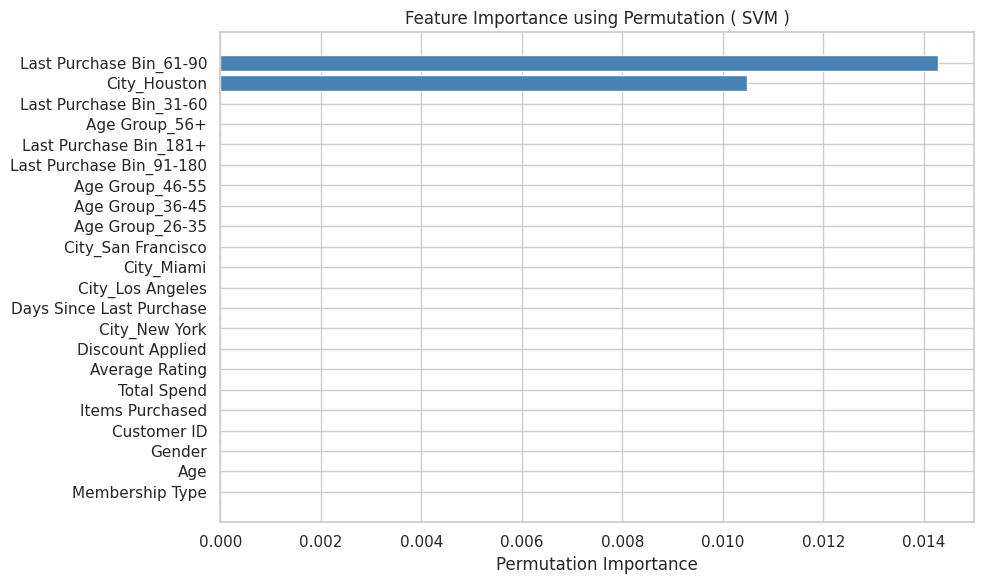

In [ ]:
result = permutation_importance(
    svm,
    X_test_scaled,
    y_test,
    n_repeats=30,
    random_state=42,
    scoring='accuracy'
)

# Convert to DataFrame for better readability
feature_importances = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False)



# Sort features by importance mean (descending for left-to-right bars)
feature_importances_sorted = feature_importances.sort_values(by='Importance Mean', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(
    feature_importances_sorted['Feature'],
    feature_importances_sorted['Importance Mean'].abs(),
    color='steelblue'
)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance using Permutation ( SVM )")
plt.tight_layout()
plt.show()


=====  SVM Classifier:   =====
Accuracy: 0.9905
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.98      1.00      0.99        41
           2       1.00      0.97      0.99        40

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105



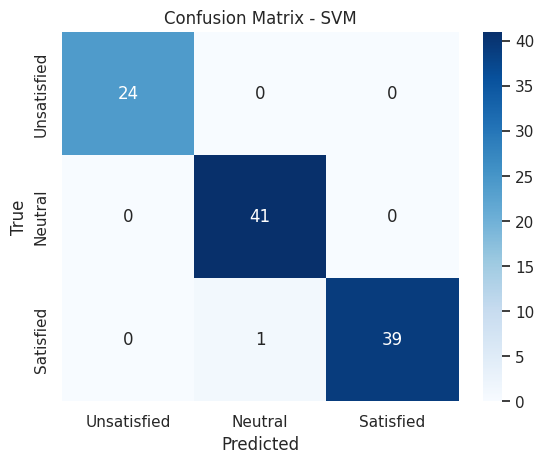

In [ ]:
# Evaluation
print("\n=====  SVM Classifier:   =====")
print(f"Accuracy: {accuracy_score(y_test, svm_preds):.4f}")
print(classification_report(y_test, svm_preds))


cm = confusion_matrix(y_test, svm_preds, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unsatisfied', 'Neutral', 'Satisfied'],
            yticklabels=['Unsatisfied', 'Neutral', 'Satisfied'])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# **3- Summary**

In [ ]:
def generate_classification_metrics_table(results):
    import pandas as pd
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    rows = []
    for model_name, y_true, y_pred in results:
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
        rows.append({
            "Model": model_name,
            "Accuracy": round(accuracy, 4),
            "Precision": round(precision, 4),
            "Recall": round(recall, 4),
            "F1-Score": round(f1, 4)
        })

    return pd.DataFrame(rows)

def generate_regression_metrics_table(results):
    import pandas as pd
    import numpy as np
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    rows = []
    for model_name, y_true, y_pred in results:
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        rows.append({
            "Model": model_name,
            "MAE": round(mae, 2),
            "MSE": round(mse, 2),
            "RMSE": round(rmse, 2),
            "R² Score": round(r2, 4)
        })

    return pd.DataFrame(rows)

classification_results = [
    ("Logistic Regression", y_test, y_pred_lr),
    ("KNN", y_test, y_pred_knn),
    ("SVM", y_test, svm_preds),
    ("Random Forest", y_test, y_pred_rf)
]

regression_results = [
    ("Linear Regression", y_test1, y_pred_reg),
    ("Gradient Boosting", y_test1, y_pred_gb)
]

classification_table = generate_classification_metrics_table(classification_results)
regression_table = generate_regression_metrics_table(regression_results)
print("\n\n\n The Classification Models Table\n")
print(classification_table)
print("\n\n\n\nThe Regressions Models Table\n")
print(regression_table)








 The Classification Models Table

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.9905     0.9907  0.9905    0.9905
1                  KNN    0.9905     0.9907  0.9905    0.9905
2                  SVM    0.9905     0.9907  0.9905    0.9905
3        Random Forest    0.9714     0.9734  0.9714    0.9714




The Regressions Models Table

               Model   MAE  MSE  RMSE  R² Score
0  Linear Regression  0.03  0.0  0.04    0.9983
1  Gradient Boosting  0.02  0.0  0.04    0.9987


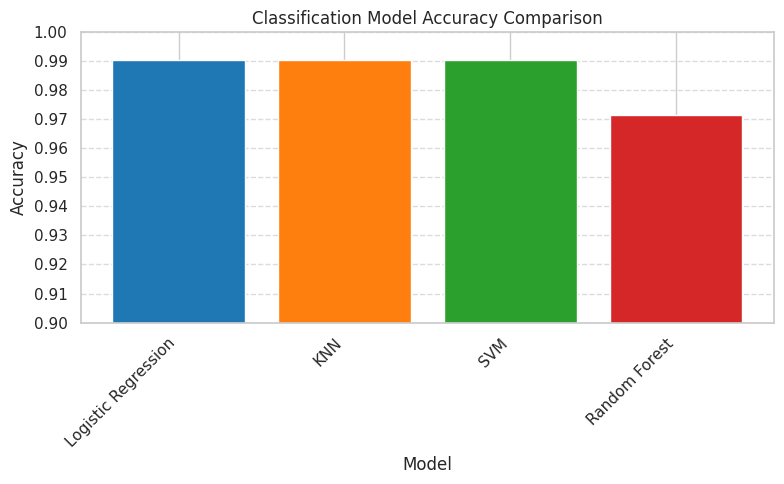

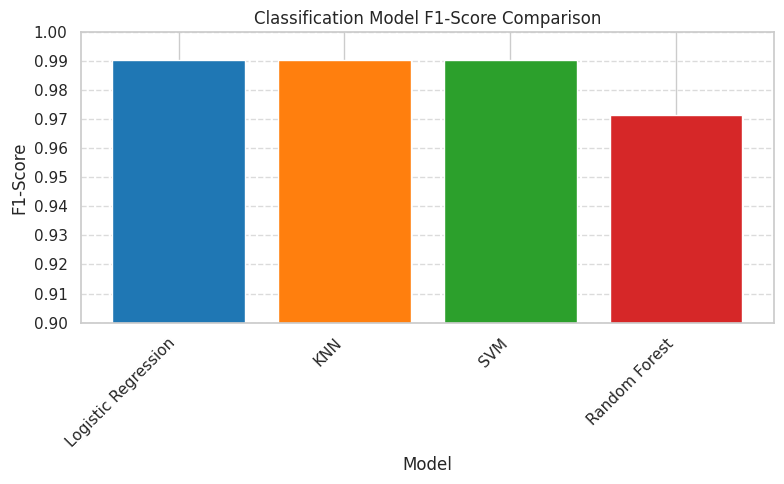

In [ ]:
models    = classification_table["Model"]
accuracies = classification_table["Accuracy"]
f1_scores  = classification_table["F1-Score"]

# Distinct colors for each bar
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'][:len(models)]

# 1) Accuracy comparison with detailed ticks from 0.90 to 1.00
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=colors)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Classification Model Accuracy Comparison")
plt.xticks(rotation=45, ha='right')
plt.ylim(0.90, 1.00)
plt.yticks(np.arange(0.90, 1.001, 0.01))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2) F1-Score comparison with detailed ticks from 0.90 to 1.00
plt.figure(figsize=(8, 5))
plt.bar(models, f1_scores, color=colors)
plt.xlabel("Model")
plt.ylabel("F1-Score")
plt.title("Classification Model F1-Score Comparison")
plt.xticks(rotation=45, ha='right')
plt.ylim(0.90, 1.00)
plt.yticks(np.arange(0.90, 1.001, 0.01))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

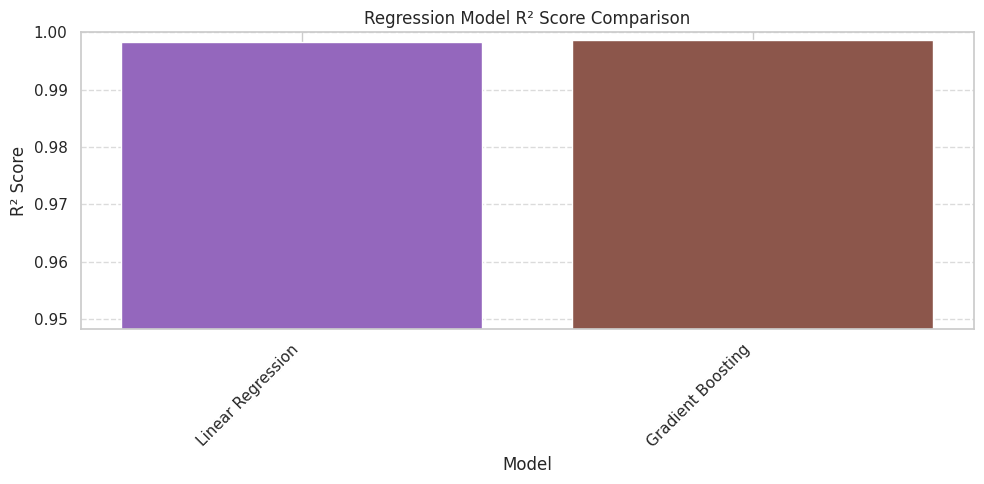

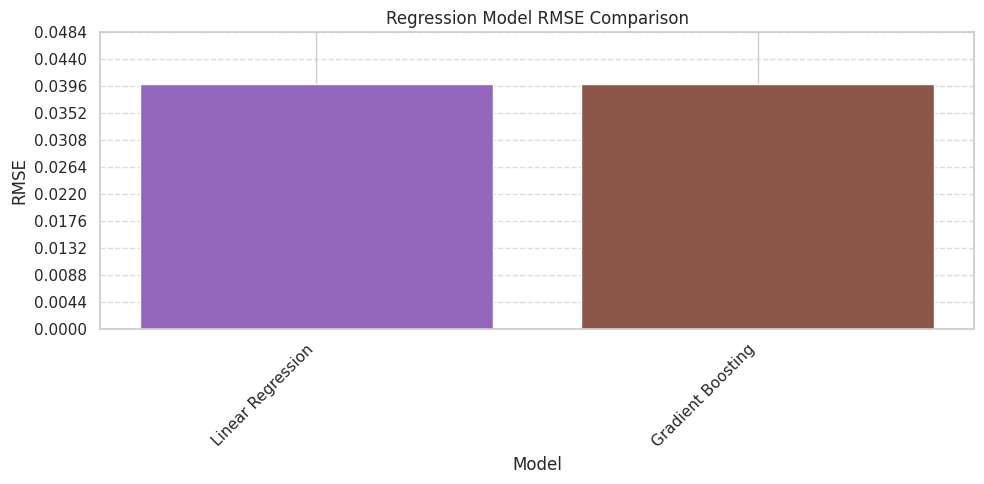

In [ ]:
models    = regression_table["Model"]
rmse      = regression_table["RMSE"]
r2_scores = regression_table["R² Score"]

# Distinct colors for each model (reuse or choose new ones)
colors = ['tab:purple', 'tab:brown'][:len(models)]

# 1) R² Score comparison
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color=colors)
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Regression Model R² Score Comparison")
plt.xticks(rotation=45, ha='right')

# Choose y-limits just below the minimum R² up to 1.00
ymin = min(r2_scores) - 0.05
plt.ylim(ymin, 1.00)

# Detailed ticks every 0.01
plt.yticks(np.arange(round(ymin, 2), 1.001, 0.01))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2) RMSE comparison
plt.figure(figsize=(10, 5))
plt.bar(models, rmse, color=colors)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Regression Model RMSE Comparison")
plt.xticks(rotation=45, ha='right')

# Choose y-limits from 0 to slightly above the max RMSE
ymax = max(rmse) + (0.1 * max(rmse))
plt.ylim(0, ymax)


step = (ymax) / 10
plt.yticks(np.arange(0, ymax + step, step))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4- Cross validations

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, KFold, cross_validate
from sklearn.preprocessing import StandardScaler

# === 1) Prepare full datasets ===
# Classification: predict Satisfaction Level
X_cls = df.drop(columns=['Satisfaction Level', 'Total Spend'])
y_cls = df['Satisfaction Level']

# Regression: predict Total Spend
X_reg = df.drop(columns=['Total Spend', 'Satisfaction Level'])
y_reg = df['Total Spend']

# === 2) Scale features once ===
scaler_cls = StandardScaler().fit(X_cls)
X_cls_scaled = scaler_cls.transform(X_cls)

scaler_reg = StandardScaler().fit(X_reg)
X_reg_scaled = scaler_reg.transform(X_reg)

# === 3) Define your already-built model instances ===
clf_models = {
    "Logistic Regression": lr_model,
    "KNN (k=5)"          : knn_model,
    "SVM"                : svm,
    "Random Forest"      : rf_model
}
reg_models = {
    "Linear Regression"  : model,      # your fitted LinearRegression()
    "Gradient Boosting"  : model1       # your fitted GradientBoostingRegressor()
}

# === 4) Cross-validate classification models ===
cv_cls = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring_cls = {'accuracy': 'accuracy', 'f1': 'f1_weighted'}

clf_rows = []
for name, m in clf_models.items():
    scores = cross_validate(
        m,
        X_cls_scaled, y_cls,
        cv=cv_cls,
        scoring=scoring_cls,
        return_train_score=False
    )
    clf_rows.append({
        "Model":      name,
        "Acc Mean":   scores['test_accuracy'].mean().round(4),
        "Acc Std":    scores['test_accuracy'].std().round(4),
        "F1 Mean":    scores['test_f1'].mean().round(4),
        "F1 Std":     scores['test_f1'].std().round(4)
    })

clf_cv_df = pd.DataFrame(clf_rows).set_index("Model")
print("=== Classification 5-Fold CV ===")
print(clf_cv_df)

# === 5) Cross-validate regression models ===
cv_reg = KFold(n_splits=10, shuffle=True, random_state=42)
scoring_reg = {
    'neg_rmse': 'neg_root_mean_squared_error',
    'r2':       'r2'
}

reg_rows = []
for name, m in reg_models.items():
    scores = cross_validate(
        m,
        X_reg_scaled, y_reg,
        cv=cv_reg,
        scoring=scoring_reg,
        return_train_score=False
    )
    rmse = -scores['test_neg_rmse']  # negate back
    reg_rows.append({
        "Model":       name,
        "RMSE Mean":   rmse.mean().round(2),
        "RMSE Std":    rmse.std().round(2),
        "R² Mean":     scores['test_r2'].mean().round(4),
        "R² Std":      scores['test_r2'].std().round(4)
    })

reg_cv_df = pd.DataFrame(reg_rows).set_index("Model")
print("\n=== Regression 5-Fold CV ===")
print(reg_cv_df)


=== Classification 5-Fold CV ===
                     Acc Mean  Acc Std  F1 Mean  F1 Std
Model                                                  
Logistic Regression    0.9714   0.0202   0.9714  0.0202
KNN (k=5)              0.9714   0.0202   0.9714  0.0202
SVM                    0.9714   0.0202   0.9714  0.0202
Random Forest          0.9943   0.0070   0.9943  0.0070

=== Regression 5-Fold CV ===
                   RMSE Mean  RMSE Std  R² Mean  R² Std
Model                                                  
Linear Regression       0.04      0.00   0.9983  0.0005
Gradient Boosting       0.06      0.07   0.9883  0.0213
